Importando bibliotecas usadas


*   numpy usada para lidar com arrays
*   matplotlib usada para lidar com plot de graficos
*   pandas usada para lidar com dataframes (tabelas)
*   csv para leitura de arquivos em csv
*   pickle usada importar os dados em plk para ser usado em dicionario python
*   coolab files para importar dados de fora para dentro do colab
*   Classification_report para ver os resultados da classificação
*   SMOTE para lidar com desbalanceamento de dados (oversampling)









In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pickle
from google.colab import files
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from math import sqrt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Criando dicionarios com os atributos

A ideia de diferentes dicionarios é separar as atividades para facilitar o classificador ter menos dificuldades

In [ ]:
ds1 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO4':[],'INFO5':[],'INFO6':[],'VM':[],'ACTIVITY':[]}
ds2 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO4':[],'INFO5':[],'INFO6':[],'VM':[],'ACTIVITY':[]}
ds3 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO4':[],'INFO5':[],'INFO6':[],'VM':[],'ACTIVITY':[]}
ds4 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO4':[],'INFO5':[],'INFO6':[],'VM':[],'ACTIVITY':[]}
ds5 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO4':[],'INFO5':[],'INFO6':[],'VM':[],'ACTIVITY':[]}

Fazendo upload do arquivo no colab

In [ ]:
uploaded = files.upload()

Saving testeNovoDic.pkl to testeNovoDic.pkl


Carregando o arquivo em dicionario python


In [ ]:
a_file = open("testeNovoDic.pkl", "rb")
dicPronto = pickle.load(a_file)
a_file.close()

Separando os arquivos em diferentes dicionario baseado em atividade

In [ ]:
for i in dicPronto:
            
    if i == 'Vacuuming' or i == 'Laundry':
        for a in dicPronto[i]:
            ds1['INFO1'].append(a[0])
            ds1['INFO2'].append(a[1])
            ds1['INFO3'].append(a[2])
            ds1['INFO4'].append(a[3])
            ds1['INFO5'].append(a[4])
            ds1['INFO6'].append(a[5])
            ds1['ACTIVITY'].append(i)
            
    elif i == 'Simulated Bowling' or i == 'Tai-chi':
        for a in dicPronto[i]:
            ds2['INFO1'].append(a[0])
            ds2['INFO2'].append(a[1])
            ds2['INFO3'].append(a[2])
            ds2['INFO4'].append(a[3])
            ds2['INFO5'].append(a[4])
            ds2['INFO6'].append(a[5])
            ds2['ACTIVITY'].append(i)

    elif i == 'Slow walk (1.8 mph)' or i == '400m walk' or i == 'Carrying groceries':
        for a in dicPronto[i]:
            ds3['INFO1'].append(a[0])
            ds3['INFO2'].append(a[1])
            ds3['INFO3'].append(a[2])
            ds3['INFO4'].append(a[3])
            ds3['INFO5'].append(a[4])
            ds3['INFO6'].append(a[5])
            ds3['ACTIVITY'].append(i)
            
    elif  i == 'Crossword puzzles' or i == 'Playing cards':
        for a in dicPronto[i]:
            ds4['INFO1'].append(a[0])
            ds4['INFO2'].append(a[1])
            ds4['INFO3'].append(a[2])
            ds4['INFO4'].append(a[3])
            ds4['INFO5'].append(a[4])
            ds4['INFO6'].append(a[5])
            ds4['ACTIVITY'].append(i)

    else:
        print(i)

Dusting
Self-care (miscellaneous)
Organizing the room
Gardening


In [ ]:
for a in range(len(ds1['INFO1'])):
  ds1['VM'].append(sqrt(ds1['INFO1'][a]**2+ds1['INFO2'][a]**2+ds1['INFO3'][a]**2))
for a in range(len(ds2['INFO1'])):
  ds2['VM'].append(sqrt(ds2['INFO1'][a]**2+ds2['INFO2'][a]**2+ds2['INFO3'][a]**2))
for a in range(len(ds3['INFO1'])):
  ds3['VM'].append(sqrt(ds3['INFO1'][a]**2+ds3['INFO2'][a]**2+ds3['INFO3'][a]**2))
for a in range(len(ds4['INFO1'])):
  ds4['VM'].append(sqrt(ds4['INFO1'][a]**2+ds4['INFO2'][a]**2+ds4['INFO3'][a]**2))

Fazendo a criação do dataframe(Tabela)

In [ ]:
sep1 = pd.DataFrame(ds1)
sep2 = pd.DataFrame(ds2)
sep3 = pd.DataFrame(ds3)
sep4 = pd.DataFrame(ds4)

Printando o historiograma e descrevendo o dataframe

------------------------Cluster 1------------------------
              INFO1         INFO2  ...         INFO6            VM
count  11498.000000  11498.000000  ...  11498.000000  11498.000000
mean      67.556706     70.632023  ...      1.159767    144.691468
std       58.687808     51.906396  ...      0.529836     85.199999
min        0.000000      0.000000  ...      0.000000      0.000000
25%       23.000000     33.000000  ...      1.000000     80.056230
50%       54.000000     60.000000  ...      1.000000    130.192166
75%       96.000000     97.750000  ...      1.000000    197.269484
max      565.000000    463.000000  ...      3.000000    660.838104

[8 rows x 7 columns]
------------------------Cluster 2------------------------
              INFO1         INFO2  ...         INFO6            VM
count  10605.000000  10605.000000  ...  10605.000000  10605.000000
mean      55.603300     33.668930  ...      1.508911     83.080551
std       96.255092     48.916839  ...      0.844156    11

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98064c3d10>,
      dtype=object)

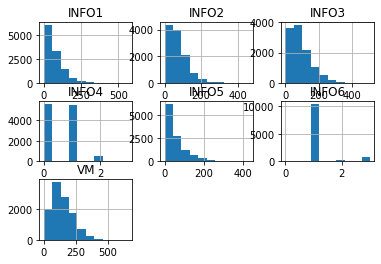

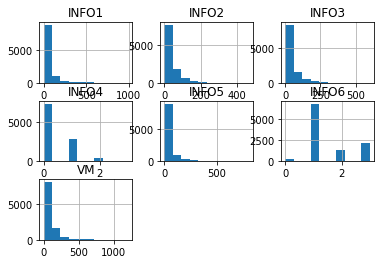

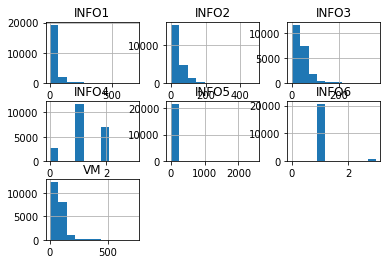

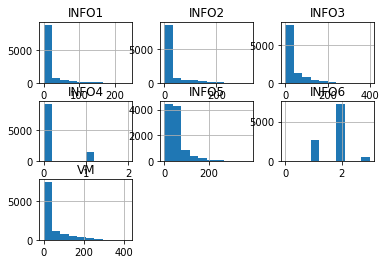

In [ ]:

print('------------------------Cluster 1------------------------')
print(sep1.describe())
sep1.hist()
print('------------------------Cluster 2------------------------')
print(sep2.describe())
sep2.hist()
print('------------------------Cluster 3------------------------')
print(sep3.describe())
sep3.hist()
print('------------------------Cluster 4------------------------')
print(sep4.describe())
sep4.hist()

Fazendo o oversampling e separando os X e y

In [ ]:
smote = SMOTE('all')
X1 = sep1.iloc[:, :-1].values
y1 = sep1.iloc[:, -1].values
print(f'X1 Antes do SMOTE {len(X1)}')
X1, y1 = smote.fit_resample(X1, y1)
print(f'X1 depois do SMOTE {len(X1)}')

X2 = sep2.iloc[:, :-1].values
y2 = sep2.iloc[:, -1].values
print(f'X2 Antes do SMOTE {len(X2)}')
X2, y2 = smote.fit_resample(X2, y2)
print(print(f'X2 depois do SMOTE {len(X2)}'))

X3 = sep3.iloc[:, :-1].values
y3 = sep3.iloc[:, -1].values
print(f'X3 Antes do SMOTE {len(X3)}')
X3, y3 = smote.fit_resample(X3, y3)
print(print(f'X3 depois do SMOTE {len(X3)}'))

X4 = sep4.iloc[:, :-1].values
y4 = sep4.iloc[:, -1].values
print(f'X4 Antes do SMOTE {len(X4)}')
X4, y4 = smote.fit_resample(X4, y4)
print(print(f'X4 depois do SMOTE {len(X4)}'))

X1 Antes do SMOTE 11498
X1 depois do SMOTE 11558
X2 Antes do SMOTE 10605
X2 depois do SMOTE 10976
None
X3 Antes do SMOTE 21528


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


X3 depois do SMOTE 32574
None
X4 Antes do SMOTE 10535
X4 depois do SMOTE 11438
None


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Regularizando os valores (A ideia é que os numeros não pesem na média e nos calculos)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)


X2 = sc.fit_transform(X2)

X3 = sc.fit_transform(X3)


X4 = sc.fit_transform(X4)


Separando os teste e treino para os futuros testes do classificador

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3, random_state = 42)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.3, random_state = 42)

Criando o classificador (RF) e fazendo os treinos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf1 = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', random_state = 42)
clf_rf2 = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', random_state = 42)
clf_rf3 = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', random_state = 42)
clf_rf4 = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', random_state = 42)


clf_rf1.fit(X_train1, y_train1)
y_pred1 = clf_rf1.predict(X_test1)

clf_rf2.fit(X_train2, y_train2)
y_pred2 = clf_rf2.predict(X_test2)

clf_rf3.fit(X_train3, y_train3)
y_pred3 = clf_rf3.predict(X_test3)

clf_rf4.fit(X_train4, y_train4)
y_pred4 = clf_rf4.predict(X_test4)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)
cm3 = confusion_matrix(y_test3, y_pred3)
cm4 = confusion_matrix(y_test4, y_pred4)

In [ ]:
print("Matriz Confusão 1")
print(cm1)
print("Matriz Confusão 2")
print(cm2)
print("Matriz Confusão 3")
print(cm3)
print("Matriz Confusão 4")
print(cm4)

Matriz Confusão 1
[[1273  486]
 [ 420 1289]]
Matriz Confusão 2
[[1327  343]
 [ 345 1278]]
Matriz Confusão 3
[[2467  521  293]
 [ 384 2609  245]
 [ 380  252 2622]]
Matriz Confusão 4
[[1426  249]
 [ 552 1205]]


In [ ]:
importance1 = clf_rf1.feature_importances_
importance2 = clf_rf2.feature_importances_
importance3 = clf_rf3.feature_importances_
importance4 = clf_rf4.feature_importances_
print(importance1)
print(importance2)
print(importance3)
print(importance4)

[0.1914025  0.17121152 0.18557117 0.03125392 0.12828812 0.01737689
 0.27489588]
[0.12636682 0.19819604 0.16435942 0.1028424  0.19537513 0.03874838
 0.17411181]
[0.17531866 0.22856563 0.21014475 0.07546079 0.07636563 0.00592111
 0.22822344]
[0.09113853 0.18580998 0.1573     0.01912702 0.28804309 0.05645962
 0.20212176]


Definindo o resultado e printando

In [ ]:
from xgboost import XGBClassifier
clf_xgb1 = XGBClassifier()
clf_xgb2 = XGBClassifier()
clf_xgb3 = XGBClassifier()
clf_xgb4 = XGBClassifier()



clf_xgb1.fit(X_train1, y_train1)
y_pred1 = clf_xgb1.predict(X_test1)

clf_xgb2.fit(X_train2, y_train2)
y_pred2 = clf_xgb2.predict(X_test2)

clf_xgb3.fit(X_train3, y_train3)
y_pred3 = clf_xgb3.predict(X_test3)

clf_xgb4.fit(X_train4, y_train4)
y_pred4 = clf_xgb4.predict(X_test4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_DT1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_DT2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_DT3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_DT4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

clf_DT1.fit(X_train1, y_train1)
y_pred1 = clf_DT1.predict(X_test1)

clf_DT2.fit(X_train2, y_train2)
y_pred2 = clf_DT2.predict(X_test2)

clf_DT3.fit(X_train3, y_train3)
y_pred3 = clf_DT3.predict(X_test3)

clf_DT4.fit(X_train4, y_train4)
y_pred4 = clf_DT4.predict(X_test4)

In [ ]:
from sklearn.svm import SVC
clf_SVM1 = SVC(kernel = 'linear', random_state = 42)
clf_SVM2 = SVC(kernel = 'linear', random_state = 42)
clf_SVM3 = SVC(kernel = 'linear', random_state = 42)
clf_SVM4 = SVC(kernel = 'linear', random_state = 42)

clf_SVM1.fit(X_train1, y_train1)
y_pred1 = clf_SVM1.predict(X_test1)

clf_SVM2.fit(X_train2, y_train2)
y_pred2 = clf_SVM2.predict(X_test2)

clf_SVM3.fit(X_train3, y_train3)
y_pred3 = clf_SVM3.predict(X_test3)

clf_SVM4.fit(X_train4, y_train4)
y_pred4 = clf_SVM4.predict(X_test4)

Usando CrossValidation


In [ ]:
from sklearn.model_selection import cross_validate

scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

scores_rf1 = cross_validate(clf_rf1, X1, y1, cv=10, scoring=scoring_list)
scores_xg1 = cross_validate(clf_xgb1, X1, y1, cv=10, scoring=scoring_list)
scores_DT1 = cross_validate(clf_DT1, X1, y1, cv=10, scoring=scoring_list)
scores_SVM1 = cross_validate(clf_SVM1, X1, y1, cv=10, scoring=scoring_list)



avg_scores_rf1 = []
avg_scores_xg1 = []
avg_scores_DT1 = []
avg_scores_SVM1 = []

for score in scoring_list:
    avg_scores_rf1.append(scores_rf1['test_'+score].mean())
    avg_scores_xg1.append(scores_xg1['test_'+score].mean())
    avg_scores_DT1.append(scores_DT1['test_'+score].mean())
    avg_scores_SVM1.append(scores_SVM1['test_'+score].mean())


print('RF - ', avg_scores_rf1)
print('XGBoost - ', avg_scores_xg1)
print('DT - ', avg_scores_DT1)
print('SVM - ', avg_scores_SVM1)

RF -  [0.7309208496232718, 0.7329127071768949, 0.7309178845358105, 0.7303287457980543]
XGBoost -  [0.7436399586572597, 0.7462956711975808, 0.7436375957254142, 0.7428482171952029]
DT -  [0.6531410746116629, 0.6547829772263924, 0.6531363753575647, 0.6523196582528445]
SVM -  [0.7438992495393879, 0.7490312895691568, 0.743898760442091, 0.7423303181237377]


In [ ]:
from sklearn.model_selection import cross_validate

scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

scores_rf2 = cross_validate(clf_rf2, X2, y2, cv=10, scoring=scoring_list)
scores_xg2 = cross_validate(clf_xgb2, X2, y2, cv=10, scoring=scoring_list)
scores_DT2 = cross_validate(clf_DT2, X2, y2, cv=10, scoring=scoring_list)
scores_SVM2 = cross_validate(clf_SVM2, X2, y2, cv=10, scoring=scoring_list)

avg_scores_rf2 = []
avg_scores_xg2 = []
avg_scores_DT2 = []
avg_scores_SVM2 = []

for score in scoring_list:
    avg_scores_rf2.append(scores_rf2['test_'+score].mean())
    avg_scores_xg2.append(scores_xg2['test_'+score].mean())
    avg_scores_DT2.append(scores_DT2['test_'+score].mean())
    avg_scores_SVM2.append(scores_SVM2['test_'+score].mean())


print('RF - ', avg_scores_rf2)
print('XGBoost - ', avg_scores_xg2)
print('DT - ', avg_scores_DT2)
print('SVM - ', avg_scores_SVM2)

RF -  [0.7832537986527256, 0.7918614795743497, 0.7832354446704693, 0.7816177610701674]
XGBoost -  [0.7916345788231858, 0.7989778854840639, 0.7916207969366998, 0.7903507463578896]
DT -  [0.7423506400134163, 0.7493705289297959, 0.7423312791671652, 0.7406035993560918]
SVM -  [0.7547345550790115, 0.767122937976724, 0.7547312299735418, 0.7519678918113861]


In [ ]:
from sklearn.model_selection import cross_validate

scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

scores_rf3 = cross_validate(clf_rf3, X3, y3, cv=10, scoring=scoring_list)
scores_xg3 = cross_validate(clf_xgb3, X3, y3, cv=10, scoring=scoring_list)
scores_DT3 = cross_validate(clf_DT3, X3, y3, cv=10, scoring=scoring_list)
scores_SVM3 = cross_validate(clf_SVM3, X3, y3, cv=10, scoring=scoring_list)

avg_scores_rf3 = []
avg_scores_xg3 = []
avg_scores_DT3 = []
avg_scores_SVM3 = []

for score in scoring_list:
    avg_scores_rf3.append(scores_rf3['test_'+score].mean())
    avg_scores_xg3.append(scores_xg3['test_'+score].mean())
    avg_scores_DT3.append(scores_DT3['test_'+score].mean())
    avg_scores_SVM3.append(scores_SVM3['test_'+score].mean())


print('RF - ', avg_scores_rf3)
print('XGBoost - ', avg_scores_xg3)
print('DT - ', avg_scores_DT3)
print('SVM - ', avg_scores_SVM3)

RF -  [0.7480006890763493, 0.7591383308145228, 0.7479962262336171, 0.7440545119292927]
XGBoost -  [0.6589398138174509, 0.6691301986858608, 0.6589323975297955, 0.6531046079715799]
DT -  [0.6836852033105068, 0.6899994597188543, 0.6836796768252836, 0.6796970043623103]
SVM -  [0.5925299958365164, 0.5854761433402593, 0.5925203610821148, 0.577128110074778]


In [ ]:
from sklearn.model_selection import cross_validate

scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

scores_rf4 = cross_validate(clf_rf4, X4, y4, cv=10, scoring=scoring_list)
scores_xg4 = cross_validate(clf_xgb4, X4, y4, cv=10, scoring=scoring_list)
scores_DT4 = cross_validate(clf_DT4, X4, y4, cv=10, scoring=scoring_list)
scores_SVM4 = cross_validate(clf_SVM4, X4, y4, cv=10, scoring=scoring_list)

avg_scores_rf4 = []
avg_scores_xg4 = []
avg_scores_DT4 = []
avg_scores_SVM4 = []

for score in scoring_list:
    avg_scores_rf4.append(scores_rf4['test_'+score].mean())
    avg_scores_xg4.append(scores_xg4['test_'+score].mean())
    avg_scores_DT4.append(scores_DT4['test_'+score].mean())
    avg_scores_SVM4.append(scores_SVM4['test_'+score].mean())


print('RF - ', avg_scores_rf4)
print('XGBoost - ', avg_scores_xg4)
print('DT - ', avg_scores_DT4)
print('SVM - ', avg_scores_SVM4)

RF -  [0.7282023750527686, 0.7426833782102032, 0.728215589139407, 0.7225167483836404]
XGBoost -  [0.7288934927714456, 0.7506519022187783, 0.7289096848860421, 0.7220453416380737]
DT -  [0.7012729505839742, 0.7164295536317216, 0.7012860825689197, 0.6943653784231426]
SVM -  [0.6750292904820464, 0.7199378098613376, 0.6750471507476762, 0.6521371133634524]


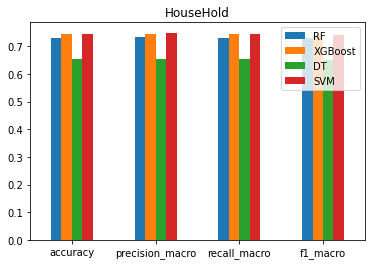

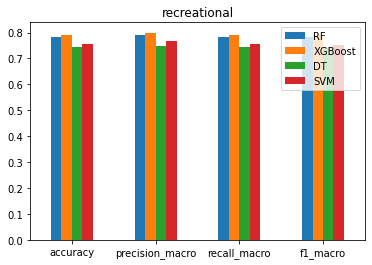

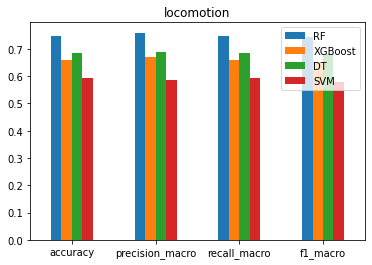

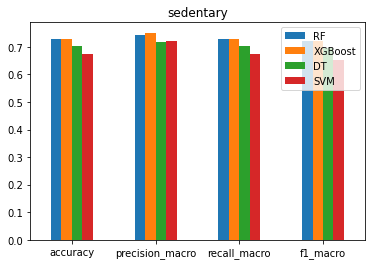

In [ ]:
df1 = pd.DataFrame({'RF': avg_scores_rf1,
                   'XGBoost': avg_scores_xg1,
                   'DT': avg_scores_DT1,
                   'SVM': avg_scores_SVM1}, index=scoring_list)
df2 = pd.DataFrame({'RF': avg_scores_rf2,
                   'XGBoost': avg_scores_xg2,
                   'DT': avg_scores_DT2,
                   'SVM': avg_scores_SVM2}, index=scoring_list)
df3 = pd.DataFrame({'RF': avg_scores_rf3,
                   'XGBoost': avg_scores_xg3,
                   'DT': avg_scores_DT3,
                   'SVM': avg_scores_SVM3}, index=scoring_list)
df4 = pd.DataFrame({'RF': avg_scores_rf4,
                   'XGBoost': avg_scores_xg4,
                   'DT': avg_scores_DT4,
                   'SVM': avg_scores_SVM4}, index=scoring_list)

ax1 = df1.plot.bar(rot=0,title= 'HouseHold')
ax2 = df2.plot.bar(rot=0,title= 'recreational')
ax3 = df3.plot.bar(rot=0,title= 'locomotion')
ax4 = df4.plot.bar(rot=0,title= 'sedentary')


In [ ]:
df1 = pd.DataFrame({'RF': avg_scores_rf1}, index=scoring_list)

ax1 = df1.plot.bar(rot=0,title= 'Teste')
ax2 = df2.plot.bar(rot=0,title= 'recreational')
ax3 = df3.plot.bar(rot=0,title= 'locomotion')
ax4 = df4.plot.bar(rot=0,title= 'sedentary')


[0.  1.5 3.  4.5]


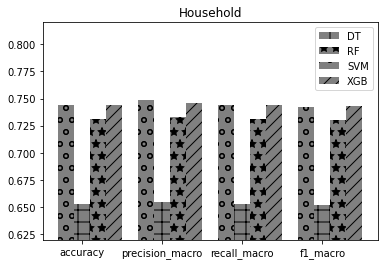

In [ ]:

label = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

xis = 1.5*np.arange(len(label))  # the label locations
width = 0.3  # the width of the bars
print(xis)

fig, ax = plt.subplots()

dt = ax.bar(xis, avg_scores_DT1 , width, label='DT', color='grey', hatch= '+')
rf = ax.bar(xis + width,avg_scores_rf1 , width, label='RF', color='grey', hatch= '*')
svm = ax.bar(xis - width, avg_scores_SVM1, width, label='SVM', color='grey', hatch= 'o')
xbt = ax.bar(xis + 2*width, avg_scores_xg1, width, label='XGB', color='grey', hatch= '//')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Household')
ax.set_xticks(xis)
ax.set_xticklabels(label)
ax.legend()




#fig.tight_layout()
plt.ylim(0.62,0.82)
plt.show()

[0.  1.5 3.  4.5]


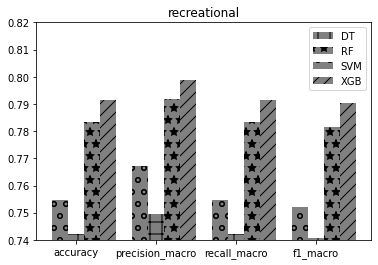

In [ ]:

label = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

xis = 1.5*np.arange(len(label))  # the label locations
width = 0.3  # the width of the bars
print(xis)

fig, ax = plt.subplots()
dt = ax.bar(xis,avg_scores_DT2 , width, label='DT', color='grey', hatch= '+')
rf = ax.bar(xis + width,avg_scores_rf2 , width, label='RF', color='grey', hatch= '*')
svm = ax.bar(xis - width, avg_scores_SVM2, width, label='SVM', color='grey', hatch= 'o')
xbt = ax.bar(xis + 2*width, avg_scores_xg2, width, label='XGB', color='grey', hatch= '//')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('recreational')
ax.set_xticks(xis)
ax.set_xticklabels(label)
ax.legend()




#fig.tight_layout()
plt.ylim(0.74,0.82)
plt.show()

[0.  1.5 3.  4.5]


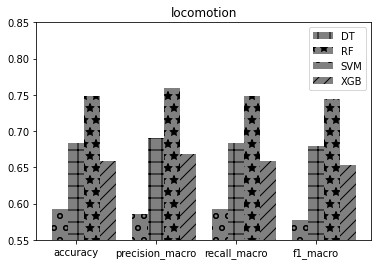

In [ ]:

label = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

xis = 1.5*np.arange(len(label))  # the label locations
width = 0.3  # the width of the bars
print(xis)

fig, ax = plt.subplots()
dt = ax.bar(xis,avg_scores_DT3 , width, label='DT', color='grey', hatch= '+')
rf = ax.bar(xis + width,avg_scores_rf3 , width, label='RF', color='grey', hatch= '*')
svm = ax.bar(xis - width, avg_scores_SVM3, width, label='SVM', color='grey', hatch= 'o')
xbt = ax.bar(xis + 2*width, avg_scores_xg3, width, label='XGB', color='grey', hatch= '//')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('locomotion')
ax.set_xticks(xis)
ax.set_xticklabels(label)
ax.legend()




#fig.tight_layout()
plt.ylim(0.55,0.85)
plt.show()

[0.  1.5 3.  4.5]


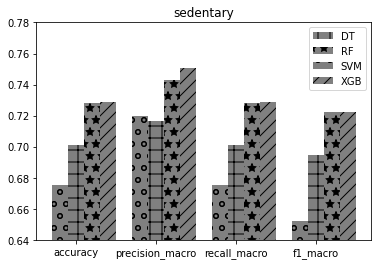

In [ ]:

label = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

xis = 1.5*np.arange(len(label))  # the label locations
width = 0.3  # the width of the bars
print(xis)

fig, ax = plt.subplots()
dt = ax.bar(xis,avg_scores_DT4 , width, label='DT', color='grey', hatch= '+')
rf = ax.bar(xis + width,avg_scores_rf4 , width, label='RF', color='grey', hatch= '*')
svm = ax.bar(xis - width, avg_scores_SVM4, width, label='SVM', color='grey', hatch= 'o')
xbt = ax.bar(xis + 2*width, avg_scores_xg4, width, label='XGB', color='grey', hatch= '//')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('sedentary')
ax.set_xticks(xis)
ax.set_xticklabels(label)
ax.legend()




#fig.tight_layout()
plt.ylim(0.64,0.78)
plt.show()